<a href="https://colab.research.google.com/github/Jaeljane/EDA/blob/main/Buenos_Aires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import warnings

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
df=pd.read_csv('/content/Buenos Aires-Sheet1.csv')
df.head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Argentina|Capital Federal|Villa Crespo|,"-34.6047834183,-58.4586812499",180000.0,USD,2729232.0,180000.0,120.0,110.0,1500.000000,1636.363636,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
1,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,NaN,250000.0,USD,3790600.0,250000.0,117.0,120.0,2136.752137,2083.333333,NaN,4.0,NaN,http://ramos-mejia.properati.com.ar/s7pd_venta...
2,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,"-34.6497002,-58.658073",410000.0,USD,6216584.0,410000.0,410.0,220.0,1000.000000,1863.636364,NaN,NaN,NaN,http://castelar-moron.properati.com.ar/11vgn_v...
3,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,"-34.5957086,-58.5669503",180000.0,USD,2729232.0,180000.0,200.0,135.0,900.000000,1333.333333,NaN,5.0,NaN,http://tres-de-febrero.properati.com.ar/7f7u_v...
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...


EDA

In [5]:
df.shape

(8606, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8606 entries, 0 to 8605
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   8606 non-null   object 
 1   property_type               8606 non-null   object 
 2   place_with_parent_names     8606 non-null   object 
 3   lat-lon                     6936 non-null   object 
 4   price                       7590 non-null   float64
 5   currency                    7590 non-null   object 
 6   price_aprox_local_currency  7590 non-null   float64
 7   price_aprox_usd             7590 non-null   float64
 8   surface_total_in_m2         5946 non-null   float64
 9   surface_covered_in_m2       7268 non-null   float64
 10  price_usd_per_m2            4895 non-null   float64
 11  price_per_m2                6520 non-null   float64
 12  floor                       1259 non-null   float64
 13  rooms                       4752 

In [7]:
#check for % of missing values
df.isnull().sum() / df.shape[0] * 100

operation                      0.000000
property_type                  0.000000
place_with_parent_names        0.000000
lat-lon                       19.405066
price                         11.805717
currency                      11.805717
price_aprox_local_currency    11.805717
price_aprox_usd               11.805717
surface_total_in_m2           30.908668
surface_covered_in_m2         15.547293
price_usd_per_m2              43.121078
price_per_m2                  24.238903
floor                         85.370672
rooms                         44.782710
expenses                      89.832675
properati_url                  0.000000
dtype: float64

In [8]:
#drop columns with 50% missing values
df.drop(columns=['expenses', 'floor'], inplace=True)

In [9]:
#create neighborhood and state columns
df["neighborhood"] = df['place_with_parent_names'].str.split("|", expand=True)[3]
df["state"] = df['place_with_parent_names'].str.split("|", expand=True)[2]
df.drop(columns=['place_with_parent_names'], inplace=True)

In [10]:
#Create lat and lon columns
df[["lat", "lon"]] = df["lat-lon"].str.split(",", expand=True).astype(float)
df.drop(columns=['lat-lon'], inplace=True)
df.head()

,operation,property_type,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,properati_url,neighborhood,state,lat,lon
0,sell,apartment,180000.0,USD,2729232.0,180000.0,120.0,110.0,1500.000000,1636.363636,4.0,http://villa-crespo.properati.com.ar/12egq_ven...,Villa Crespo,Capital Federal,-34.604783,-58.458681
1,sell,house,250000.0,USD,3790600.0,250000.0,117.0,120.0,2136.752137,2083.333333,4.0,http://ramos-mejia.properati.com.ar/s7pd_venta...,La Matanza,Bs.As. G.B.A. Zona Oeste,NaN,NaN
2,sell,house,410000.0,USD,6216584.0,410000.0,410.0,220.0,1000.000000,1863.636364,NaN,http://castelar-moron.properati.com.ar/11vgn_v...,Morón,Bs.As. G.B.A. Zona Oeste,-34.649700,-58.658073
3,sell,house,180000.0,USD,2729232.0,180000.0,200.0,135.0,900.000000,1333.333333,5.0,http://tres-de-febrero.properati.com.ar/7f7u_v...,Tres de Febrero,Bs.As. G.B.A. Zona Oeste,-34.595709,-58.566950
4,sell,apartment,129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,http://chacarita.properati.com.ar/10qlv_venta_...,Chacarita,Capital Federal,-34.584651,-58.454693


In [11]:
#drop high and low cardinality column
df[["operation", "currency", 'properati_url']].nunique()
df.drop(columns=['operation', 'currency', 'properati_url'], inplace=True)

In [12]:
df.describe()


,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,lat,lon
count,7.590000e+03,7.590000e+03,7.590000e+03,5946.000000,7268.000000,4895.000000,6520.000000,4752.000000,6936.000000,6936.000000
mean,2.982076e+05,3.591849e+06,2.368919e+05,252.829129,140.324436,1718.750516,3732.986942,3.066498,-34.527040,-58.566745
std,5.074586e+05,4.758038e+06,3.138051e+05,938.374862,764.092931,1577.024430,12265.592013,1.386481,2.159191,1.723458
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2.224587,1.000000,-38.952561,-122.030796
25%,9.500000e+04,1.364616e+06,9.000000e+04,48.000000,46.000000,916.666667,1450.000000,2.000000,-34.642085,-58.580754
50%,1.550000e+05,2.228873e+06,1.470000e+05,95.000000,76.500000,1600.000000,1961.109231,3.000000,-34.598854,-58.498221
75%,3.000000e+05,4.018036e+06,2.650000e+05,250.000000,160.000000,2186.130431,2677.707373,4.000000,-34.523098,-58.422441
max,1.111111e+07,1.212992e+08,8.000000e+06,62034.000000,62034.000000,54990.000000,450000.000000,20.000000,40.620948,-49.337746


Text(0.5, 1.0, 'Distribution of Apartment size')

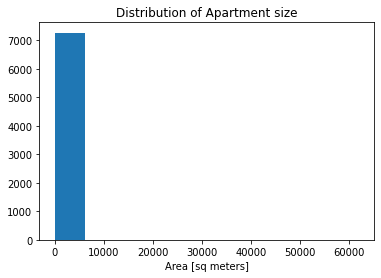

In [13]:
#plot histogram
plt.hist(df['surface_covered_in_m2'])
plt.xlabel('Area [sq meters]')
plt.title('Distribution of Apartment size')

In [14]:
#remove outliers
low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
Outlier= df["surface_covered_in_m2"].between(low, high)
df= df[Outlier]

Mean Average prices

In [15]:
mean_price_by_property_type	= df.groupby("property_type")['price_aprox_usd'].mean().sort_values(ascending=False)
px.bar(mean_price_by_property_type, y='price_aprox_usd', title='Mean price by property type')

In [16]:
mean_price_by_state = df.groupby("state")['price_aprox_usd'].mean().sort_values(ascending=False)
px.bar(mean_price_by_state, y='price_aprox_usd', title='Mean price by state')

In [17]:
mean_price_by_neighborhoods = df.groupby("neighborhood")['price_aprox_usd'].mean().sort_values(ascending=False)

px.bar(mean_price_by_neighborhoods, y='price_aprox_usd', title='Mean price by neighborhood')

Is there a relationship between size and price?

In [35]:
fig = px.scatter(df, x="surface_covered_in_m2", y="price_aprox_usd", color='property_type', title='Relationship between Price and Surface area')
fig.show()




In [19]:
p_correlation = df['surface_covered_in_m2'].corr(df['price_aprox_usd'])
print(p_correlation)

0.5553538296391375


Is there a relationship between location and price of properties

In [20]:
# Plot Mapbox expensive location and price
df_expe= df[df['price_aprox_usd']<500_000]
fig = px.scatter_mapbox(
    df_expe,  # Our DataFrame
    lat='lat',
    lon='lon',
    width=600,  # Width of map
    height=600,  # Height of map
    color='price_aprox_usd',
    hover_data=["price_aprox_usd"],
    title='Price of properties by location'
)

fig.update_layout(mapbox_style="open-street-map")


fig.show()

Feature selection-Target being 'price_aprox_usd'

In [21]:
df.head()

,property_type,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,neighborhood,state,lat,lon
0,apartment,180000.0,2729232.0,180000.0,120.0,110.0,1500.000000,1636.363636,4.0,Villa Crespo,Capital Federal,-34.604783,-58.458681
1,house,250000.0,3790600.0,250000.0,117.0,120.0,2136.752137,2083.333333,4.0,La Matanza,Bs.As. G.B.A. Zona Oeste,NaN,NaN
2,house,410000.0,6216584.0,410000.0,410.0,220.0,1000.000000,1863.636364,NaN,Morón,Bs.As. G.B.A. Zona Oeste,-34.649700,-58.658073
3,house,180000.0,2729232.0,180000.0,200.0,135.0,900.000000,1333.333333,5.0,Tres de Febrero,Bs.As. G.B.A. Zona Oeste,-34.595709,-58.566950
4,apartment,129000.0,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,Chacarita,Capital Federal,-34.584651,-58.454693


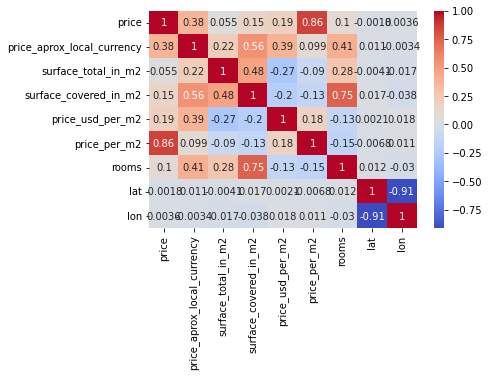

In [22]:
corr= df.select_dtypes('number').drop(columns='price_aprox_usd').corr()
sns.heatmap(corr, annot = True, cmap= 'coolwarm');

In [23]:
#drop columns that can cause leakage
df.drop(columns=["price", 'price_aprox_local_currency', 'price_per_m2', 'price_usd_per_m2'], inplace=True)

In [24]:
#drop columns that would cause multicollinearity
df.drop(columns=['rooms',"surface_total_in_m2"], inplace=True)

In [25]:
df = df.dropna()

In [26]:
pip install --upgrade category_encoders

     |████████████████████████████████| 86 kB 2.9 MB/s 


Split and buld the predict model

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted
from category_encoders import OneHotEncoder


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [28]:
imputer = SimpleImputer(missing_values=np.nan)

In [29]:
imputer = imputer.fit(df[['lat','lon']])

In [30]:
#split
features=['surface_covered_in_m2','lat','lon','neighborhood']
target="price_aprox_usd"

X_train = df[features]
y_train = df[target]

In [31]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean]*len(y_train)
baseline_mae = mean_absolute_error(y_train,y_pred_baseline)
print("Mean apt price:", y_mean)
print("Baseline MAE:", baseline_mae)

Mean apt price: 192022.49677884614
Baseline MAE: 103157.23446512222


In [32]:
ohe = OneHotEncoder(use_cat_names=True)
ohe.fit(X_train)

XT_train = ohe.transform(X_train)
print(XT_train.shape)
model = make_pipeline( OneHotEncoder(use_cat_names=True),SimpleImputer(),Ridge())
model.fit(X_train, y_train)

(4368, 90)


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['neighborhood'], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

In [33]:
y_pred_training= model.predict(X_train)

print("Training MAE:", mean_absolute_error(y_train, y_pred_training))

Training MAE: 59826.57885619519


In [36]:
#evaluate
X_test = pd.read_excel("/content/Buenos Aires- feature test.xlsx")[features]
print(X_test.info())
X_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1486 entries, 0 to 1485
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surface_covered_in_m2  1486 non-null   int64  
 1   lat                    1423 non-null   float64
 2   lon                    1423 non-null   float64
 3   neighborhood           1475 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 46.6+ KB
None


,surface_covered_in_m2,lat,lon,neighborhood
0,47,-34.615310,-58.361983,Puerto Madero
1,55,-34.547298,-58.462705,Nuñez
2,34,-34.617762,-58.383662,Monserrat
3,34,-34.639925,-58.438406,Parque Chacabuco
4,42,-34.611495,-58.442359,Caballito


In [37]:
y_test_pred = y_pred_test = model.predict(X_test)
y_pred_test[:5]

array([552305.14012908, 200416.89426175,  75502.99536746,  72105.30241776,
       118612.67960194])

In [38]:
#Intercept and feature importance
intercept = model.named_steps['ridge'].intercept_
coefficients = model.named_steps['ridge'].coef_
features = model.named_steps['onehotencoder'].get_feature_names()
feat_imp = pd.Series(coefficients, index=features)
feat_imp

surface_covered_in_m2             1601.472107
lat                               1684.553868
lon                               2595.195020
neighborhood_Villa Crespo        42380.214676
neighborhood_Morón              -36778.524074
                                     ...     
neighborhood_Monte Castro         3558.828666
neighborhood_Tribunales          21724.391372
neighborhood_Villa Santa Rita    -7270.759468
neighborhood_Velez Sarsfield     -9179.735710
neighborhood_Cañuelas             9083.790168
Length: 90, dtype: float64

In [39]:
feat_imp=pd.Series(coefficients, index=features)
feat_imp.head()

surface_covered_in_m2         1601.472107
lat                           1684.553868
lon                           2595.195020
neighborhood_Villa Crespo    42380.214676
neighborhood_Morón          -36778.524074
dtype: float64

Text(0.5, 1.0, 'Feature Importances for property Price')

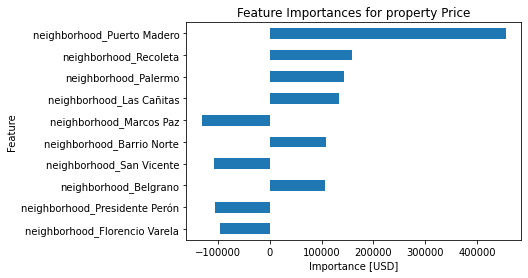

In [41]:
# Create horizontal bar chart=
feat_imp.sort_values(key=abs).tail(10).plot(kind="barh")
plt.xlabel('Importance [USD]')
plt.ylabel('Feature')
plt.title("Feature Importances for property Price")

# Don't delete the code below 👇
#plt.savefig("images/25-14.png", dpi=150)